# Analysis of Tokens 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import activations as act

In [2]:
sard_sqli_token = pd.read_pickle('SARD_SQLI_token.pkl')
sard_sqli_graph = pd.read_pickle('SARD_SQLI_graph.pkl')

In [3]:
sard_sqli_token[1==sard_sqli_token.predicted].index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            788, 789, 790, 791, 792, 793, 794, 795, 796, 797],
           dtype='int64', length=386)

In [4]:
idx=787

## Code Tokens

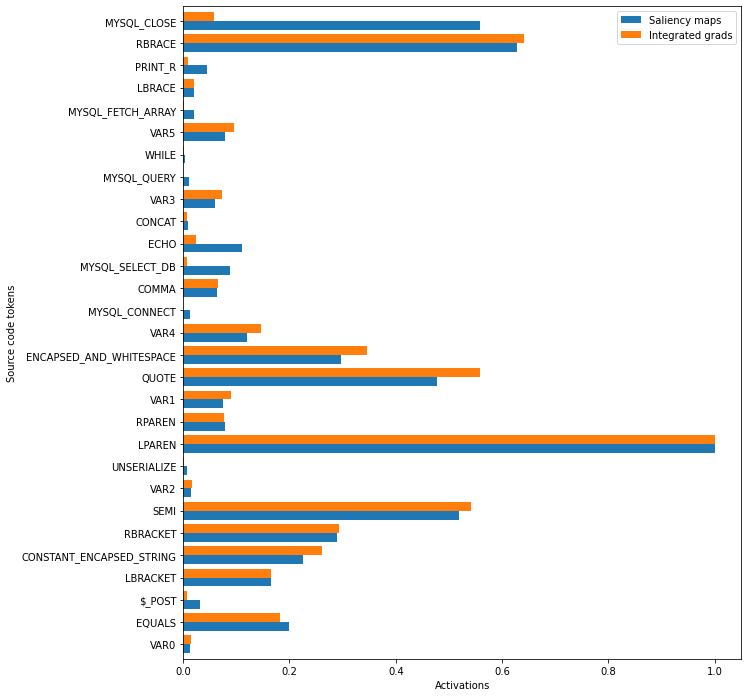

In [5]:
act.display_activations(sard_sqli_token,idx)

## Graph Tokens

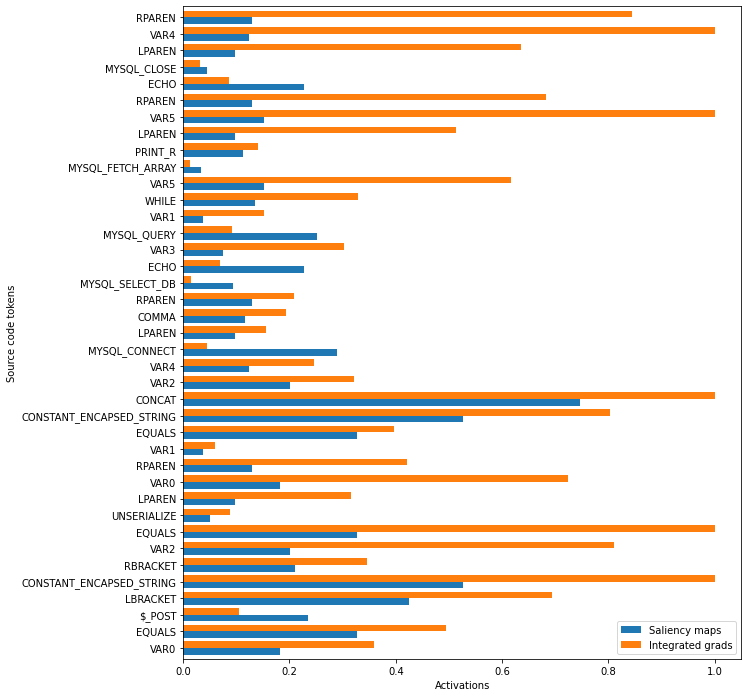

In [6]:
act.display_activations(sard_sqli_graph,idx)

## Top code tokens 

In [7]:
k=[]

def tt(x):
    for word in x:
        k.append(word)
sard_sqli_token.function.apply(tt)

0      None
1      None
2      None
3      None
4      None
       ... 
793    None
794    None
795    None
796    None
797    None
Name: function, Length: 798, dtype: object

In [8]:
pd.value_counts(k)[:50]

SEMI                             8574
QUOTE                            7920
RPAREN                           7227
LPAREN                           7227
EQUALS                           5610
CONSTANT_ENCAPSED_STRING         3990
ENCAPSED_AND_WHITESPACE          3891
COMMA                            2949
VAR1                             2649
VAR2                             1962
CONCAT                           1872
VAR3                             1548
VAR0                             1539
VAR4                             1398
ECHO                             1368
VAR5                             1284
LBRACKET                         1197
RBRACKET                         1197
LBRACE                           1056
RBRACE                           1056
LNUMBER                           813
VAR6                              768
MYSQL_QUERY                       684
MYSQL_FETCH_ARRAY                 684
WHILE                             684
MYSQL_SELECT_DB                   684
MYSQL_CLOSE 

## Top special code tokens

In [9]:
sql = [
	# // Abstraction Layers
	# // 'dba_open',
	# // 'dba_popen',
	'dba_insert',
	'dba_fetch',
	'dba_delete',
	'dbx_query',
	'odbc_do',
	'odbc_exec',
	'odbc_execute',
	'db2_exec' ,
	'db2_execute',
	'fbsql_db_query',
	'fbsql_query',
	'ibase_query',
	'ibase_execute',
	'ifx_query',
	'ifx_do',
	'ingres_query',
	'ingres_execute',
	'ingres_unbuffered_query',
	'msql_db_query',
	'msql_query',
	# // 'msql',
	'mssql_query',
	'mssql_execute',
	'mysql_connect',
	'mysql_select_db',
	'mysql_close',
	'mysql_db_query',
	'mysql_query',
	'mysql_fetch_array',
	'mysql_unbuffered_query',
	'mysqli_stmt_execute',
	'mysqli_query',
	'mysqli_real_query',
	'mysqli_master_query',
	'oci_execute',
	'ociexecute',
	'ovrimos_exec',
	'ovrimos_execute',
	'ora_do',
	'ora_exec',
	'pg_query',
	'pg_send_query',
	'pg_send_query_params',
	'pg_send_prepare',
	'pg_prepare',
	'sqlite_open',
	'sqlite_popen',
	'sqlite_array_query',
	'arrayQuery',
	'singleQuery',
	'sqlite_query',
	'sqlite_exec',
	'sqlite_single_query',
	'sqlite_unbuffered_query',
	'sybase_query',
	'sybase_unbuffered_query',


]

exec = [
		'backticks',
		'exec',
		'expect_popen',
		'passthru',
		'pcntl_exec',
		'popen',
		'proc_open',
		'shell_exec',
		'system',
		'eval',
		]

preg = [
		'preg_filter',
		'preg_grep',
		'preg_last_error',
		'preg_match_all',
		'preg_match',
		'preg_quote',
		'preg_replace_callback',
		'preg_replace',
		'ereg_replace',
		'ereg',
		'eregi_replace',
		'eregi',
	]

input = [
		'$_GET',
		'$_POST',
		'$_COOKIE',
		'$_REQUEST',
		'$_FILES',
		'$_SERVER',
		'$HTTP_GET_VARS',
		'$HTTP_POST_VARS',
		'$HTTP_COOKIE_VARS',
		'$HTTP_REQUEST_VARS',
		'$HTTP_POST_FILES',
		'$HTTP_SERVER_VARS',
		'$HTTP_RAW_POST_DATA',
		'$argc',
		'$argv',
		'get_headers',
		'getallheaders',
		'get_browser',
		'import_request_variables',
	]

echo = [
	'echo',
	'print_r',
	'printf',
	'vprintf',
	'trigger_error',
	'user_error',
	'odbc_result_all',
	'ifx_htmltbl_result'
]

html = [
	'htmlspecialchars',
	'htmlentities',
	'ENT_QUOTES',
]

filtering = [
	'filter_var',
	'mysql_real_escape_string',
	'addslashes',
]

additionals = [
	'proc_open',
	'proc_close',
	'rawurlencode',
	'is_resource',
	'fgets',
	'in_array',
	'sprintf',
	'unserialize',
	'fread',
	'fopen',
	'fclose',
	'urlencode',
	'escapeshellarg',
	'http_build_query',
	'FILTER_SANITIZE_EMAIL',
	'FILTER_VALIDATE_EMAIL',
	'FILTER_SANITIZE_FULL_SPECIAL_CHARS',
	'FILTER_SANITIZE_MAGIC_QUOTES',
	'FILTER_SANITIZE_NUMBER_FLOAT',
	'FILTER_VALIDATE_FLOAT',
	'FILTER_SANITIZE_NUMBER_INT',
	'FILTER_VALIDATE_INT',
	'FILTER_SANITIZE_SPECIAL_CHARS',
]

casting = [
	# 'float',
	# 'int',
	'settype',
	'floatval',
	'intval',
]


#sql stuff
# 'sprintf', 'unserialize', 'preg_match', 'pclose', 'fread', 'proc_open', 'fopen', 'exec', 'popen', 'fclose', 'stream_get_contents', 'proc_close', 'fgets', 'shell_exec', 'mysql_real_escape_string', 'filter_var', 'system', 'is_resource'

combined = sql + echo + input + preg +  exec + filtering + html + additionals + casting + ["FUNCTION_CALL"]
combined = [item.upper() for item in combined]

In [10]:
k2=[]
for one in k:
    if one in combined:
        k2.append(one)

In [11]:
pd.value_counts(k2)

ECHO                                  1368
MYSQL_QUERY                            684
MYSQL_CONNECT                          684
MYSQL_SELECT_DB                        684
PRINT_R                                684
MYSQL_FETCH_ARRAY                      684
MYSQL_CLOSE                            684
FILTER_VAR                             360
$_GET                                  228
SPRINTF                                180
FCLOSE                                 171
FILTER_VALIDATE_EMAIL                  144
$_POST                                 114
FUNCTION_CALL                          114
FILTER_SANITIZE_FULL_SPECIAL_CHARS      72
FILTER_SANITIZE_EMAIL                   72
MYSQL_REAL_ESCAPE_STRING                72
PREG_MATCH                              72
FILTER_SANITIZE_SPECIAL_CHARS           72
PROC_OPEN                               57
FGETS                                   57
EXEC                                    57
FREAD                                   57
FOPEN      

## Top graph tokens

In [12]:
k=[]

def tt(x):
    for word in x:
        k.append(word)
sard_sqli_graph.function.apply(tt)

0      None
1      None
2      None
3      None
4      None
       ... 
793    None
794    None
795    None
796    None
797    None
Name: function, Length: 798, dtype: object

In [13]:
pd.value_counts(k)[:55]

CONSTANT_ENCAPSED_STRING              7140
LPAREN                                6999
RPAREN                                6999
EQUALS                                5439
CONCAT                                3003
COMMA                                 2835
VAR1                                  2649
VAR2                                  1962
QUOTE                                 1896
VAR3                                  1548
VAR0                                  1539
VAR4                                  1398
LBRACKET                              1368
ECHO                                  1368
RBRACKET                              1311
VAR5                                  1284
ENCAPSED_AND_WHITESPACE                948
STRING                                 855
VAR6                                   768
LNUMBER                                756
WHILE                                  684
MYSQL_CLOSE                            684
MYSQL_CONNECT                          684
MYSQL_QUERY

## Top special graph tokens

In [14]:
k2=[]
for one in k:
    if one in combined:
        k2.append(one)
pd.value_counts(k2)

ECHO                                  1368
MYSQL_QUERY                            684
MYSQL_CONNECT                          684
PRINT_R                                684
MYSQL_FETCH_ARRAY                      684
MYSQL_SELECT_DB                        684
MYSQL_CLOSE                            684
FILTER_VAR                             360
$_GET                                  228
SPRINTF                                180
FCLOSE                                 171
FILTER_VALIDATE_EMAIL                  144
SHELL_EXEC                             114
$_POST                                 114
FILTER_SANITIZE_FULL_SPECIAL_CHARS      72
PREG_MATCH                              72
FILTER_SANITIZE_SPECIAL_CHARS           72
FILTER_SANITIZE_EMAIL                   72
MYSQL_REAL_ESCAPE_STRING                72
PROC_OPEN                               57
FGETS                                   57
FOPEN                                   57
EXEC                                    57
FREAD      

## Top gradients and integrated gradients (graph)

In [52]:
temp = sard_sqli_graph
#temp = sard_sqli_graph[sard_sqli_graph.function.apply(lambda x: x==sard_sqli_graph.function.value_counts().index[0])]
temp = sard_sqli_graph[sard_sqli_graph.predicted==1]
all_func=[]
grads = []
igrad =[]

working = [len(grad)!=len(ig) for grad,ig in zip(temp.gradients,temp.ig)]

#temp[working].function.apply(all_func.extend)
#temp[working].gradients.apply(grads.extend)
#temp[working].ig.apply(igrad.extend)

temp.function.apply(all_func.extend)
temp.gradients.apply(grads.extend)
temp.ig.apply(igrad.extend)

0      None
1      None
2      None
3      None
4      None
       ... 
793    None
794    None
795    None
796    None
797    None
Name: ig, Length: 386, dtype: object

In [56]:
(sard_sqli_graph[sard_sqli_graph.predicted==1])[working].ig

513    [0.541901, 0.095458515, 0.06947741, 1.0, 0.186...
514    [0.54188025, 0.09962045, 0.070110455, 0.999999...
515    [0.5419182, 0.10409289, 0.07079065, 1.0, 0.213...
516    [0.5414378, 0.10723997, 0.07046661, 0.99999994...
517    [0.53980327, 0.10811719, 0.06780581, 0.9999999...
518    [0.5382767, 0.10943068, 0.06529855, 1.0, 0.247...
519    [0.53512406, 0.10751527, 0.0599195, 1.0000001,...
520    [0.53193104, 0.10550231, 0.05444123, 0.9999999...
522    [0.5268038, 0.10284211, 0.045909304, 1.0, 0.28...
523    [0.52364445, 0.100849345, 0.04048836, 1.0, 0.2...
525    [0.5187119, 0.09774196, 0.031633053, 1.0, 0.30...
526    [0.5157273, 0.095283866, 0.025845107, 1.0, 0.3...
527    [0.51321715, 0.0921157, 0.019349787, 1.0, 0.33...
528    [0.5102709, 0.08963598, 0.013610338, 1.0, 0.34...
529    [0.507318, 0.08720617, 0.007886855, 1.0, 0.352...
530    [0.5048296, 0.084062405, 0.0014434466, 1.0, 0....
531    [0.5047304, 0.084861554, 0.99999994, 0.3829220...
532    [0.50534314, 0.08703724,

In [40]:
mydf = pd.DataFrame({'token':all_func, 'grads':grads, 'ig':igrad})
mydf = mydf.groupby('token').mean()

#mydf = mydf.drop_duplicates(subset = ["token"])

ValueError: arrays must all be same length

In [45]:
len(grads)

33080

In [ ]:
mydf.sort_values('grads',ascending=False)[:10]

In [ ]:
mydf.sort_values('ig',ascending=False)[:10]

In [ ]:
mydf.plot.barh(figsize=(10,15),width=0.8)

## Top gradients and IG for SPECIAL TOKENS (graph)

In [ ]:
pd.value_counts(mydf.index.isin(k2))

In [ ]:
tmp = mydf[mydf.index.isin(k2)]

In [ ]:
tmp.sort_values('ig',ascending=False)

In [ ]:
tmp.plot.barh(figsize=(10,12),width=0.8)

In [ ]:
sard_sqli_graph.function.value_counts()

In [ ]:
subs = sard_sqli_graph[sard_sqli_graph.function.apply(lambda x: x==sard_sqli_graph.function.value_counts().index[1])]

In [ ]:
subs.index

In [ ]:
pd.value_counts(subs.predicted)

In [ ]:
subs2 = sard_sqli_token[sard_sqli_token.function.apply(lambda x: x==sard_sqli_token.function.value_counts().index[1])]

In [ ]:
subs2.index

In [ ]:
subs